In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing nessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras as kr
from keras.models import Sequential
from keras.layers import Flatten, Dropout, Dense
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from sklearn.metrics import fbeta_score
from os import listdir

# Load Data From data set

In [2]:
# Load data
train = pd.read_csv('/kaggle/input/planets-dataset/planet/planet/train_classes.csv')
train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


 # Getting unique tags

In [3]:
# Getting unique tags
train_val = train['tags'].values
split = [x.split(' ') for x in train_val]
lst = []
for sublst in split:
    lst += sublst
labels = list(set(lst))
labels

['road',
 'cloudy',
 'artisinal_mine',
 'primary',
 'water',
 'selective_logging',
 'haze',
 'bare_ground',
 'blow_down',
 'cultivation',
 'agriculture',
 'partly_cloudy',
 'blooming',
 'slash_burn',
 'conventional_mine',
 'habitation',
 'clear']

## Mapping Tags

In [4]:

dic = {}
for x, y in enumerate(labels):
    dic[y] = x
dic


{'road': 0,
 'cloudy': 1,
 'artisinal_mine': 2,
 'primary': 3,
 'water': 4,
 'selective_logging': 5,
 'haze': 6,
 'bare_ground': 7,
 'blow_down': 8,
 'cultivation': 9,
 'agriculture': 10,
 'partly_cloudy': 11,
 'blooming': 12,
 'slash_burn': 13,
 'conventional_mine': 14,
 'habitation': 15,
 'clear': 16}

## Getting the Some Preview images

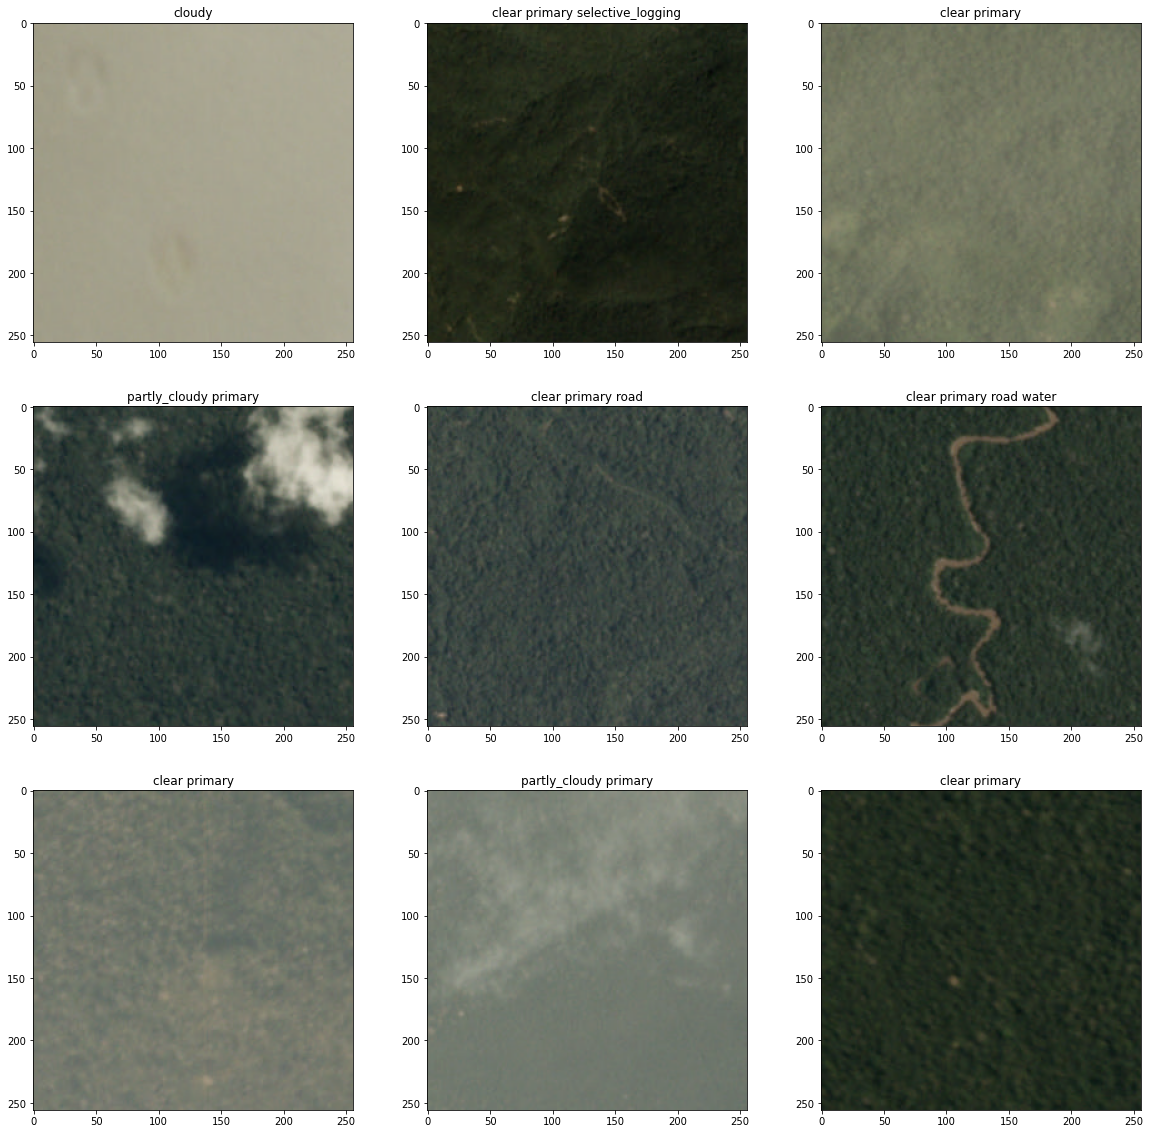

In [5]:
fig,ax = plt.subplots(3,3, figsize = (20,20))
for i,j in enumerate(np.random.randint(0,train.shape[0],9)):
    image_path = '/kaggle/input/planets-dataset/planet/planet/train-jpg/train_{}.jpg'.format(str(j))
    img = cv2.imread(image_path)
    ax[int(i/3),i%3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[int(i/3),i%3].set_title(train.iloc[j,1])

##  Encoding and Processing

In [6]:
x_train = []
y_train = []

for x, tags in tqdm(train.values, miniters=1500):
    img = cv2.imread('/kaggle/input/planets-dataset/planet/planet/train-jpg/{}.jpg'.format(x))
    targets = np.zeros(17)
    for tag in tags.split(' '):
        targets[dic[tag]] = 1
    x_train.append(cv2.resize(img, (32,32)))
    y_train.append(targets)

y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float16) / 255

print(x_train.shape)
print(y_train.shape)

100%|██████████| 40479/40479 [04:57<00:00, 136.29it/s]


(40479, 32, 32, 3)
(40479, 17)


### Splitting data

In [7]:
split = 33000
x_train, x_test, y_train, y_test = x_train[:split], x_train[split:], y_train[:split], y_train[split:]

# 1st  Model Training

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=(32,32,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])

2023-01-16 16:59:57.837955: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
history = model.fit(x_train, y_train,
             batch_size=128,
             epochs=6,
             verbose=1,
             validation_data=(x_test, y_test))

2023-01-16 16:59:58.857315: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/6
258/258 [==============================] - 47s 177ms/step - loss: 0.2522 - accuracy: 0.6819 - val_loss: 0.1988 - val_accuracy: 0.7502
Epoch 2/6
258/258 [==============================] - 45s 176ms/step - loss: 0.2044 - accuracy: 0.7289 - val_loss: 0.1864 - val_accuracy: 0.7325
Epoch 3/6
258/258 [==============================] - 45s 173ms/step - loss: 0.1917 - accuracy: 0.7259 - val_loss: 0.1791 - val_accuracy: 0.7421
Epoch 4/6
258/258 [==============================] - 45s 175ms/step - loss: 0.1830 - accuracy: 0.7207 - val_loss: 0.1751 - val_accuracy: 0.7366
Epoch 5/6
258/258 [==============================] - 45s 173ms/step - loss: 0.1773 - accuracy: 0.7122 - val_loss: 0.1667 - val_accuracy: 0.7369
Epoch 6/6
258/258 [==============================] - 45s 175ms/step - loss: 0.1735 - accuracy: 0.7045 - val_loss: 0.1680 - val_accuracy: 0.7327


## Evaluation of  Model

In [10]:
valid = model.predict(x_test, batch_size=128)
print(fbeta_score(y_test, np.array(valid) > 0.2, beta=2, average='samples'))

0.8347930512083808


Text(0.5, 1.0, 'Loss Curves - before tweaking')

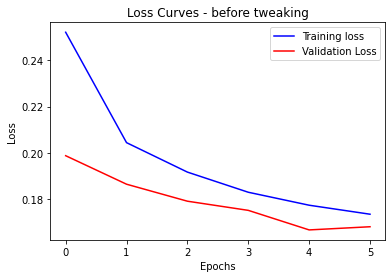

In [11]:
# Visualize Loss

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before tweaking')

## 2 nd Model Training (Add more layers)


In [12]:
model = Sequential()
# Block 1
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(32, (3,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))

#Block 2
model.add(Conv2D(64, (3,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))

#Block 3
model.add(Conv2D(128, (3,3), input_shape=(128,128,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(17, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
history = model.fit(x_train, y_train,
                 batch_size=128,
                 epochs=6,
                 verbose=1,
                 validation_data=(x_test, y_test))

Epoch 1/6
258/258 [==============================] - 88s 337ms/step - loss: 0.2125 - accuracy: 0.7233 - val_loss: 0.1803 - val_accuracy: 0.7349
Epoch 2/6
258/258 [==============================] - 86s 333ms/step - loss: 0.1632 - accuracy: 0.7032 - val_loss: 0.1584 - val_accuracy: 0.7139
Epoch 3/6
258/258 [==============================] - 86s 334ms/step - loss: 0.1462 - accuracy: 0.6970 - val_loss: 0.1426 - val_accuracy: 0.6774
Epoch 4/6
258/258 [==============================] - 86s 333ms/step - loss: 0.1355 - accuracy: 0.6846 - val_loss: 0.1328 - val_accuracy: 0.6032
Epoch 5/6
258/258 [==============================] - 86s 333ms/step - loss: 0.1300 - accuracy: 0.6794 - val_loss: 0.1327 - val_accuracy: 0.7157
Epoch 6/6
258/258 [==============================] - 85s 330ms/step - loss: 0.1244 - accuracy: 0.6959 - val_loss: 0.1274 - val_accuracy: 0.6963


# Evaluation of  Model

In [14]:
valid = model.predict(x_test, batch_size=128)
print(fbeta_score(y_test, np.array(valid) > 0.2, beta=2, average='samples'))

0.8854298739936828


Text(0.5, 1.0, 'Loss Curves - after tweaking')

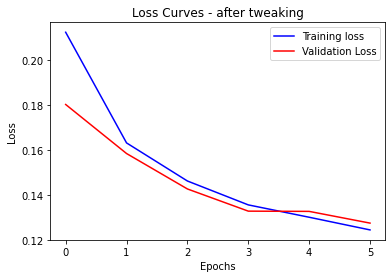

In [15]:
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after tweaking')

# Implementing  Model on test data

In [16]:
x_test = []
x_test_add = []
img_title = []
img_title_add = []

for x in tqdm(listdir('/kaggle/input/planets-dataset/planet/planet/test-jpg'), miniters=1500):
    img_name = x.split('.')[0]
    img = cv2.imread('/kaggle/input/planets-dataset/planet/planet/test-jpg/{}.jpg'.format(img_name))
    x_test.append(cv2.resize(img, (32,32)))
    img_title.append(img_name)
    
for x in tqdm(listdir('/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional'), miniters=1500):
    img_name = x.split('.')[0]
    img = cv2.imread('/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/{}.jpg'.format(img_name))
    x_test_add.append(cv2.resize(img, (32,32)))
    img_title_add.append(img_name)
    
x_test = np.array(x_test, np.float16) / 255
x_test_add = np.array(x_test_add, np.float16) / 255

100%|██████████| 20522/20522 [02:52<00:00, 119.21it/s]


In [17]:
pred1 = model.predict(x_test, batch_size=128)
pred2 = model.predict(x_test_add, batch_size=128)

In [22]:
image1 = []
tags1 = []
for i, img in enumerate(img_title):
    image1.append(img)
    tags1.append(' '.join(np.array(labels)[pred1[i] > 0.2]))
df1 = pd.DataFrame()
df1['image_name'] = image1
df1['tags'] = tags1

image2 = []
tags2 = []
for i, img in enumerate(img_title_add):
    image2.append(img)
    tags2.append(' '.join(np.array(labels)[pred2[i] > 0.2]))
df2 = pd.DataFrame()
df2['image_name'] = image2
df2['tags'] = tags2

In [19]:
full_df = pd.concat([df1, df2])
full_df

,image_name,tags
0,test_39140,road primary cultivation agriculture clear
1,test_4849,primary haze clear
2,test_18979,road primary water cultivation agriculture hab...
3,test_24790,road primary agriculture clear
4,test_30624,primary clear
...,...,...
20517,file_6101,primary agriculture partly_cloudy
20518,file_7113,primary clear
20519,file_9271,road primary water agriculture clear
20520,file_13908,road primary water agriculture habitation clear


## Saving The output to  submission file

In [20]:
full_df.to_csv('submission.csv', index=False)

In [21]:
pd.read_csv('/kaggle/working/submission.csv')

,image_name,tags
0,test_39140,road primary cultivation agriculture clear
1,test_4849,primary haze clear
2,test_18979,road primary water cultivation agriculture hab...
3,test_24790,road primary agriculture clear
4,test_30624,primary clear
...,...,...
61186,file_6101,primary agriculture partly_cloudy
61187,file_7113,primary clear
61188,file_9271,road primary water agriculture clear
61189,file_13908,road primary water agriculture habitation clear
